<img src="https://pytorch.org/docs/0.4.0/_static/pytorch-logo-dark.svg" width = "50%" height="50%">

# Crash course in PyTorch
Presented by:<br />
Paras Maharjan<br />
Graduate Research Assistant<br />
Multimedia Computing and Communication Lab (MCC) - UMKC<br />
Email: paras.maharjan@mail.umkc.edu<br />
Web: http://p.web.umkc.edu/pmc4p

## What we will do in this tutorial
- Basics of Deep Learning
- Why PyTorch
- Install Pytorch
- Basics of Pytorch
- Example 1: Linear Regression
- Example 2: Image Classification with VGG network
- Example 3: Transfer learning

Note:

Pytorch has very good documentation https://pytorch.org/docs/stable/index.html and its super easy to start for the beginners

You can find almost everything within the document

Stackoverflow and https://discuss.pytorch.org are other good resources

## Basics of Deep Learning

### What is Deep Learning

<img src="https://cdn.cnn.com/cnnnext/dam/assets/190124172814-deepmind-ai-starcraft-exlarge-169.jpg" width="90%" height="90%">

The Google-owned artificial intelligence lab, DeepMind's new "AlphaStar" AI had beaten two of the world's best StarCraft II players. StarCraft II is real-time strategy game and need great human intelligence to make strategic moves. 

<img src="https://cdn-images-1.medium.com/max/1600/0*4aHRjVXRKsyUhm2b" width="90%" height="90%">

<img src="https://cdn-images-1.medium.com/max/1600/0*5kA2vn4UqmI4iKLM" width="50%" height="50%">

Two stages:
- Training: 
The deep learning model learns the prior from large set of data with input and ground truth pairs. Deep Learning algorithm will try to minimize the difference between its predicted and expected output which in turn allows a deep learning model to generalize to inputs that it hasn’t seen before.
- Testing: 
Unseen data is feed to the trained model to get the prediction.

## Why PyTorch

### Deep Learning Framework
<img src="https://www.nvidia.com/content/dam/en-zz/es_em/Solutions/deep-learning/deep-learning-developer/deep-learning-developer-frameworks-407.png">


### Play with some Machine Learning and Deep Learning Online Tools

- http://scs.ryerson.ca/~aharley/vis/conv/
- https://playground.tensorflow.org/

### Datasets

<a href="https://tiny-imagenet.herokuapp.com/"> Tiny-ImageNet - Subset of ImageNet</a>

<a href="https://download.pytorch.org/tutorial/hymenoptera_data.zip"> Hymenoptera Dataset</a>


## Install PyTorch

- Download Anaconda: https://www.anaconda.com/distribution/
- Go to Pytorch website: https://pytorch.org/
- Select the suitable preference to generate the installation command
- In the terminal type: `conda install pytorch-cpu torchvision-cpu -c pytorch`

## Basics of PyTorch

In [ ]:
import torch

In [8]:
torch.__version__

'1.0.0'

In [3]:
torch.cuda.is_available()

False

In [6]:
torch.empty(5,2)

tensor([[8.5719e-16, 9.2205e-43],
        [9.8962e+03, 4.5907e-41],
        [2.8026e-45, 0.0000e+00],
        [       nan,        nan],
        [4.4409e-16, 9.2205e-43]])

In [14]:
# random numbers from a uniform distribution on the interval [0, 1)
torch.rand(3, 3)

tensor([[0.4939, 0.0684, 0.6200],
        [0.3825, 0.8224, 0.6772],
        [0.9143, 0.3802, 0.8866]])

In [15]:
# random int between [low, high)
torch.randint(-10,10,(3,3))

tensor([[-8,  4,  4],
        [-1, -4,  0],
        [-1, -7, -5]])

In [23]:
# random numbers from a normal distribution with mean 0 and variance 1
torch.randn(3, 3)

tensor([[-2.1390, -0.5780, -0.9191],
        [ 0.4679,  1.3007,  1.3408],
        [-0.2116,  0.0476, -0.2766]])

In [52]:
# Create a tersor
x=torch.tensor([[1,2,3],[4,5,6]])
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [78]:
y = torch.randint_like(x,0,10)
print(y)

tensor([[0, 3, 8],
        [0, 1, 1]])


In [55]:
# Few other torch tensors
torch.zeros(5)

tensor([1., 1., 1., 1., 1.])

In [57]:
-torch.ones(3)

tensor([-1., -1., -1.])

In [59]:
torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [63]:
torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]),dtype=torch.double)

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

### Tensor datatypes
<img src = "tensor_datatypes.png">

In [83]:
# Operations
print("x=",x)
print("y=",y)

# addition
torch.add(x, y)

x= tensor([[1, 2, 3],
        [4, 5, 6]])
y= tensor([[0, 3, 8],
        [0, 1, 1]])


tensor([[ 1,  5, 11],
        [ 4,  6,  7]])

In [91]:
# multiplication
torch.matmul(x, y.t())

tensor([[30,  5],
        [63, 11]])

In [97]:
# Few other functions
x.shape

torch.Size([2, 3])

In [98]:
x.view(-1)

tensor([1, 2, 3, 4, 5, 6])

In [96]:
x.view(3,2)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

## Example 1: Regression

Regression predictive modeling is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y).

In [118]:
"""
Referenced from tutorial page: https://morvanzhou.github.io/tutorials/
Dependencies:
torch: 0.4 and above
matplotlib
"""
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

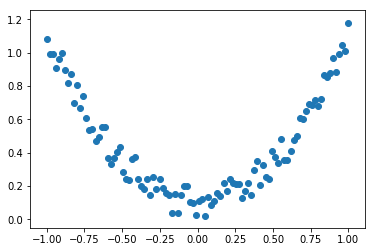

In [169]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)
# x = torch.unsqueeze(torch.linspace(0, 22/7, 200), dim=1)
# y = torch.sin(2*x) + 0.2*torch.rand(x.size())
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [170]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [171]:
# Hyperparameter
n_feature= 1
n_hidden = 10
n_output = 1
lr       = 0.2
epochs   = 200

In [172]:
net = Net(n_feature, n_hidden, n_output)     # define the network
print(net)  # net architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [173]:
optimizer = torch.optim.SGD(net.parameters(), lr)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

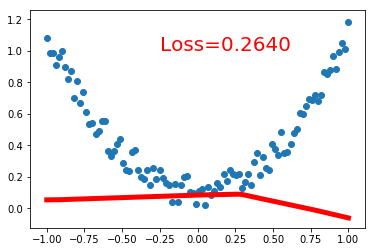

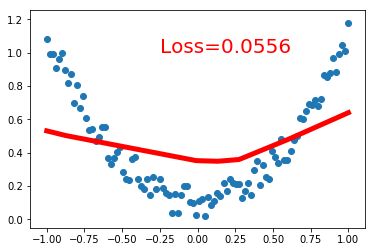

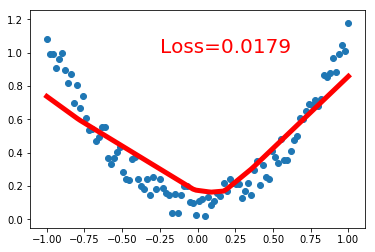

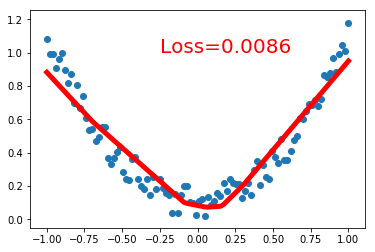

In [174]:
# Training
for t in range(epochs):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 50 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(-0.25,1, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

In [178]:
# test
with torch.no_grad():
    prediction = net(torch.tensor([0.75]))
    print(prediction)

tensor([0.6920])


## Example 2: Classification

Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y)

### Import library

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import os
import glob
from torch.utils.data import Dataset
from PIL import Image

### Custom Dataloader

In [2]:
EXTENSION = 'JPEG'
NUM_IMAGES_PER_CLASS = 500
CLASS_LIST_FILE = 'wnids.txt'
VAL_ANNOTATION_FILE = 'val_annotations.txt'


class TinyImageNet(Dataset):
    def __init__(self, root, split='train', transform=None, target_transform=None, in_memory=False):
        self.root = os.path.expanduser(root)
        self.split = split
        self.transform = transform
        self.target_transform = target_transform
        self.in_memory = in_memory
        self.split_dir = os.path.join(root, self.split)
        self.image_paths = sorted(glob.iglob(os.path.join(self.split_dir, '**', '*.%s' % EXTENSION), recursive=True))
        self.labels = {}  # fname - label number mapping
        self.images = []  # used for in-memory processing

        # build class label - number mapping
        #print(self.root)
        with open('data/tiny-imagenet-200/wnids.txt', 'r') as fp:
            self.label_texts = sorted([text.strip() for text in fp.readlines()])
        self.label_text_to_number = {text: i for i, text in enumerate(self.label_texts)}

        if self.split == 'train':
            for label_text, i in self.label_text_to_number.items():
                for cnt in range(NUM_IMAGES_PER_CLASS):
                    self.labels['%s_%d.%s' % (label_text, cnt, EXTENSION)] = i
        elif self.split == 'val':
            with open('data/tiny-imagenet-200/val/val_annotations.txt', 'r') as fp:
                for line in fp.readlines():
                    terms = line.split('\t')
                    file_name, label_text = terms[0], terms[1]
                    self.labels[file_name] = self.label_text_to_number[label_text]

        # read all images into torch tensor in memory to minimize disk IO overhead
        if self.in_memory:
            self.images = [self.read_image(path) for path in self.image_paths]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        file_path = self.image_paths[index]

        if self.in_memory:
            img = self.images[index]
        else:
            img = self.read_image(file_path)

        if self.split == 'test':
            return img
        else:
            return img, self.labels[os.path.basename(file_path)]

    def __repr__(self):
        fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
        fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
        tmp = self.split
        fmt_str += '    Split: {}\n'.format(tmp)
        fmt_str += '    Root Location: {}\n'.format(self.root)
        tmp = '    Transforms (if any): '
        fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        tmp = '    Target Transforms (if any): '
        fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        return fmt_str

    def read_image(self, path):
        img = Image.open(path)
        return self.transform(img) if self.transform else img

### Prepare your data

In [3]:
normalize = transforms.Normalize((.5, .5, .5), (.5, .5, .5))

augmentation = transforms.RandomApply([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(64)], p=.8)

training_transform = transforms.Compose([
    transforms.Lambda(lambda x: x.convert("RGB")),
    augmentation,
    transforms.ToTensor(),
    normalize])

valid_transform = transforms.Compose([
    transforms.Lambda(lambda x: x.convert("RGB")),
    transforms.ToTensor(),
    normalize])

root = 'data/tiny-imagenet-200'
training_set = TinyImageNet(root, 'train', transform=training_transform, in_memory=False)
valid_set = TinyImageNet(root, 'val', transform=valid_transform, in_memory=False)

### Define your model

<img src="https://cdn-images-1.medium.com/max/800/1*qyc21qM0oxWEuRaj-XJKcw.png">

In [5]:
class AlexNet(nn.Module):

    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

### Define Hyperparameter

In [10]:
lr = 0.01
weight_decay = 0.0001
momentum = 0.9
epochs = 10

### Define model, loss function and optimizer

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = AlexNet(num_classes=200)
model = model.to(device)
ce_loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr, momentum, weight_decay)

### Train the model

In [ ]:
trainloader = DataLoader(training_set, batch_size=32, shuffle=True)
for epoch in range(epochs):
        #start = time.time()
        #lr_scheduler.step()
        epoch_loss = 0.0
        model.train()
        for idx, (data, target) in enumerate(trainloader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            batch_loss = ce_loss(output, target)
            batch_loss.backward()
            optimizer.step()
            epoch_loss += batch_loss.item()
        
            print('{:.1f}% of epoch'.format(idx / float(len(trainloader)) * 100), end='\r')
        epoch_loss /= float(len(trainloader))
        print('Avg Epoch Loss: ', epoch_loss)

### Test the model

In [ ]:
validloader = DataLoader(valid_set, batch_size=64)
with torch.no_grad():
    model.eval()
    for idx, (data, target) in enumerate(validloader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, pred = torch.max(output, 1) # output.topk(1) *1 = top1

        num_hits += (pred == target).sum().item()
valid_acc = num_hits / num_instances * 100
print(f' Validation acc: {valid_acc}%')

## Example 3: Transfer Learning

Transfer learning is the improvement of learning in a new task through the transfer of knowledge from a related task that has already been learned.

In [180]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

plt.ion()   # interactive mode

In [197]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

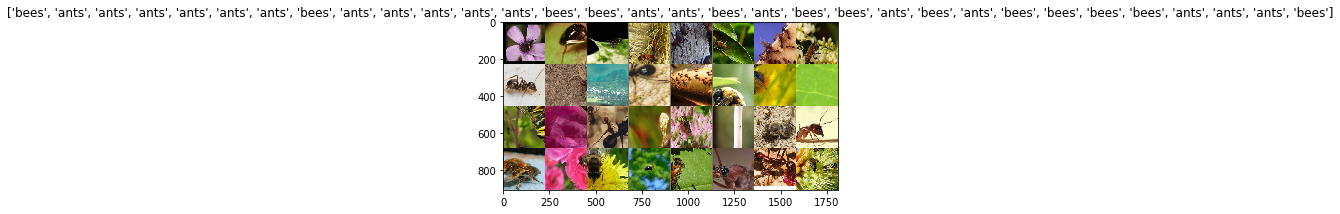

In [198]:
# Lets visualize few image
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [199]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    print("loss: ", loss.item())
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [202]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [201]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=2)

Epoch 0/1
----------
loss:  0.6841992735862732
loss:  0.7237826585769653
loss:  0.7068542838096619
loss:  0.7635443210601807
loss:  0.6642175912857056
loss:  0.6937643885612488
loss:  0.7561973333358765
loss:  0.9135446548461914
train Loss: 0.7296 Acc: 0.5000
loss:  0.6771255731582642
loss:  0.7253474593162537
loss:  0.6978768110275269
loss:  0.7240926623344421
loss:  0.7191361784934998
val Loss: 0.7082 Acc: 0.4575

Epoch 1/1
----------
loss:  0.6472622752189636
loss:  0.7255828976631165
loss:  0.7015493512153625
loss:  0.6202833652496338
loss:  0.7046048641204834
loss:  0.7172476053237915
loss:  0.6613743305206299
loss:  0.6697452664375305
train Loss: 0.6815 Acc: 0.5574
loss:  0.68751060962677
loss:  0.6649181842803955
loss:  0.6686555743217468
loss:  0.6751858592033386
loss:  0.6849569082260132
val Loss: 0.6758 Acc: 0.5817

Training complete in 18m 16s
Best val Acc: 0.581699


In [204]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=2)

Epoch 0/1
----------
loss:  0.8454934358596802
loss:  0.802422821521759
loss:  0.8853954076766968
loss:  0.7158984541893005
loss:  0.7216452956199646
loss:  0.7288527488708496
loss:  0.7017802000045776
loss:  0.6759815216064453
train Loss: 0.7638 Acc: 0.5041
loss:  0.5643672347068787
loss:  0.6475884318351746
loss:  0.49230077862739563
loss:  0.5242274403572083
loss:  0.5145704746246338
val Loss: 0.5502 Acc: 0.7320

Epoch 1/1
----------
loss:  0.5536338686943054
loss:  0.5805848836898804
loss:  0.4767204821109772
loss:  0.44787493348121643
loss:  0.5024015307426453
loss:  0.41458433866500854
loss:  0.30711594223976135
loss:  0.4096822142601013
train Loss: 0.4641 Acc: 0.8238
loss:  0.45377784967422485
loss:  0.39757606387138367
loss:  0.2295772135257721
loss:  0.27999797463417053
loss:  0.31361162662506104
val Loss: 0.3359 Acc: 0.8954

Training complete in 15m 2s
Best val Acc: 0.895425


In [205]:
# Prediction on test data
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

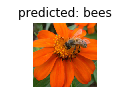

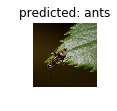

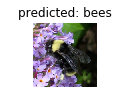

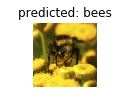

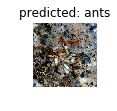

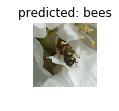

In [206]:
visualize_model(model_ft)